In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pickle

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=1.2
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
# Load the dataset
auto = pd.read_csv('../processed_data.csv')

In [7]:
auto

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,price
0,-1.556730,-1.487080,1.562910,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.150492
1,-1.377193,1.649640,-1.155800,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789511
2,-1.377193,-1.005951,0.140250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.186813
3,-1.332766,0.516029,-0.171924,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.615748
4,-1.268524,0.958192,-0.428630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.049832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401994,1.713520,-1.160991,1.005225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.217494
401995,1.713520,1.671317,-1.418196,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.847986
401996,1.713520,0.712782,-1.004854,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.744724
401997,1.791374,-0.867057,-0.428630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.098690


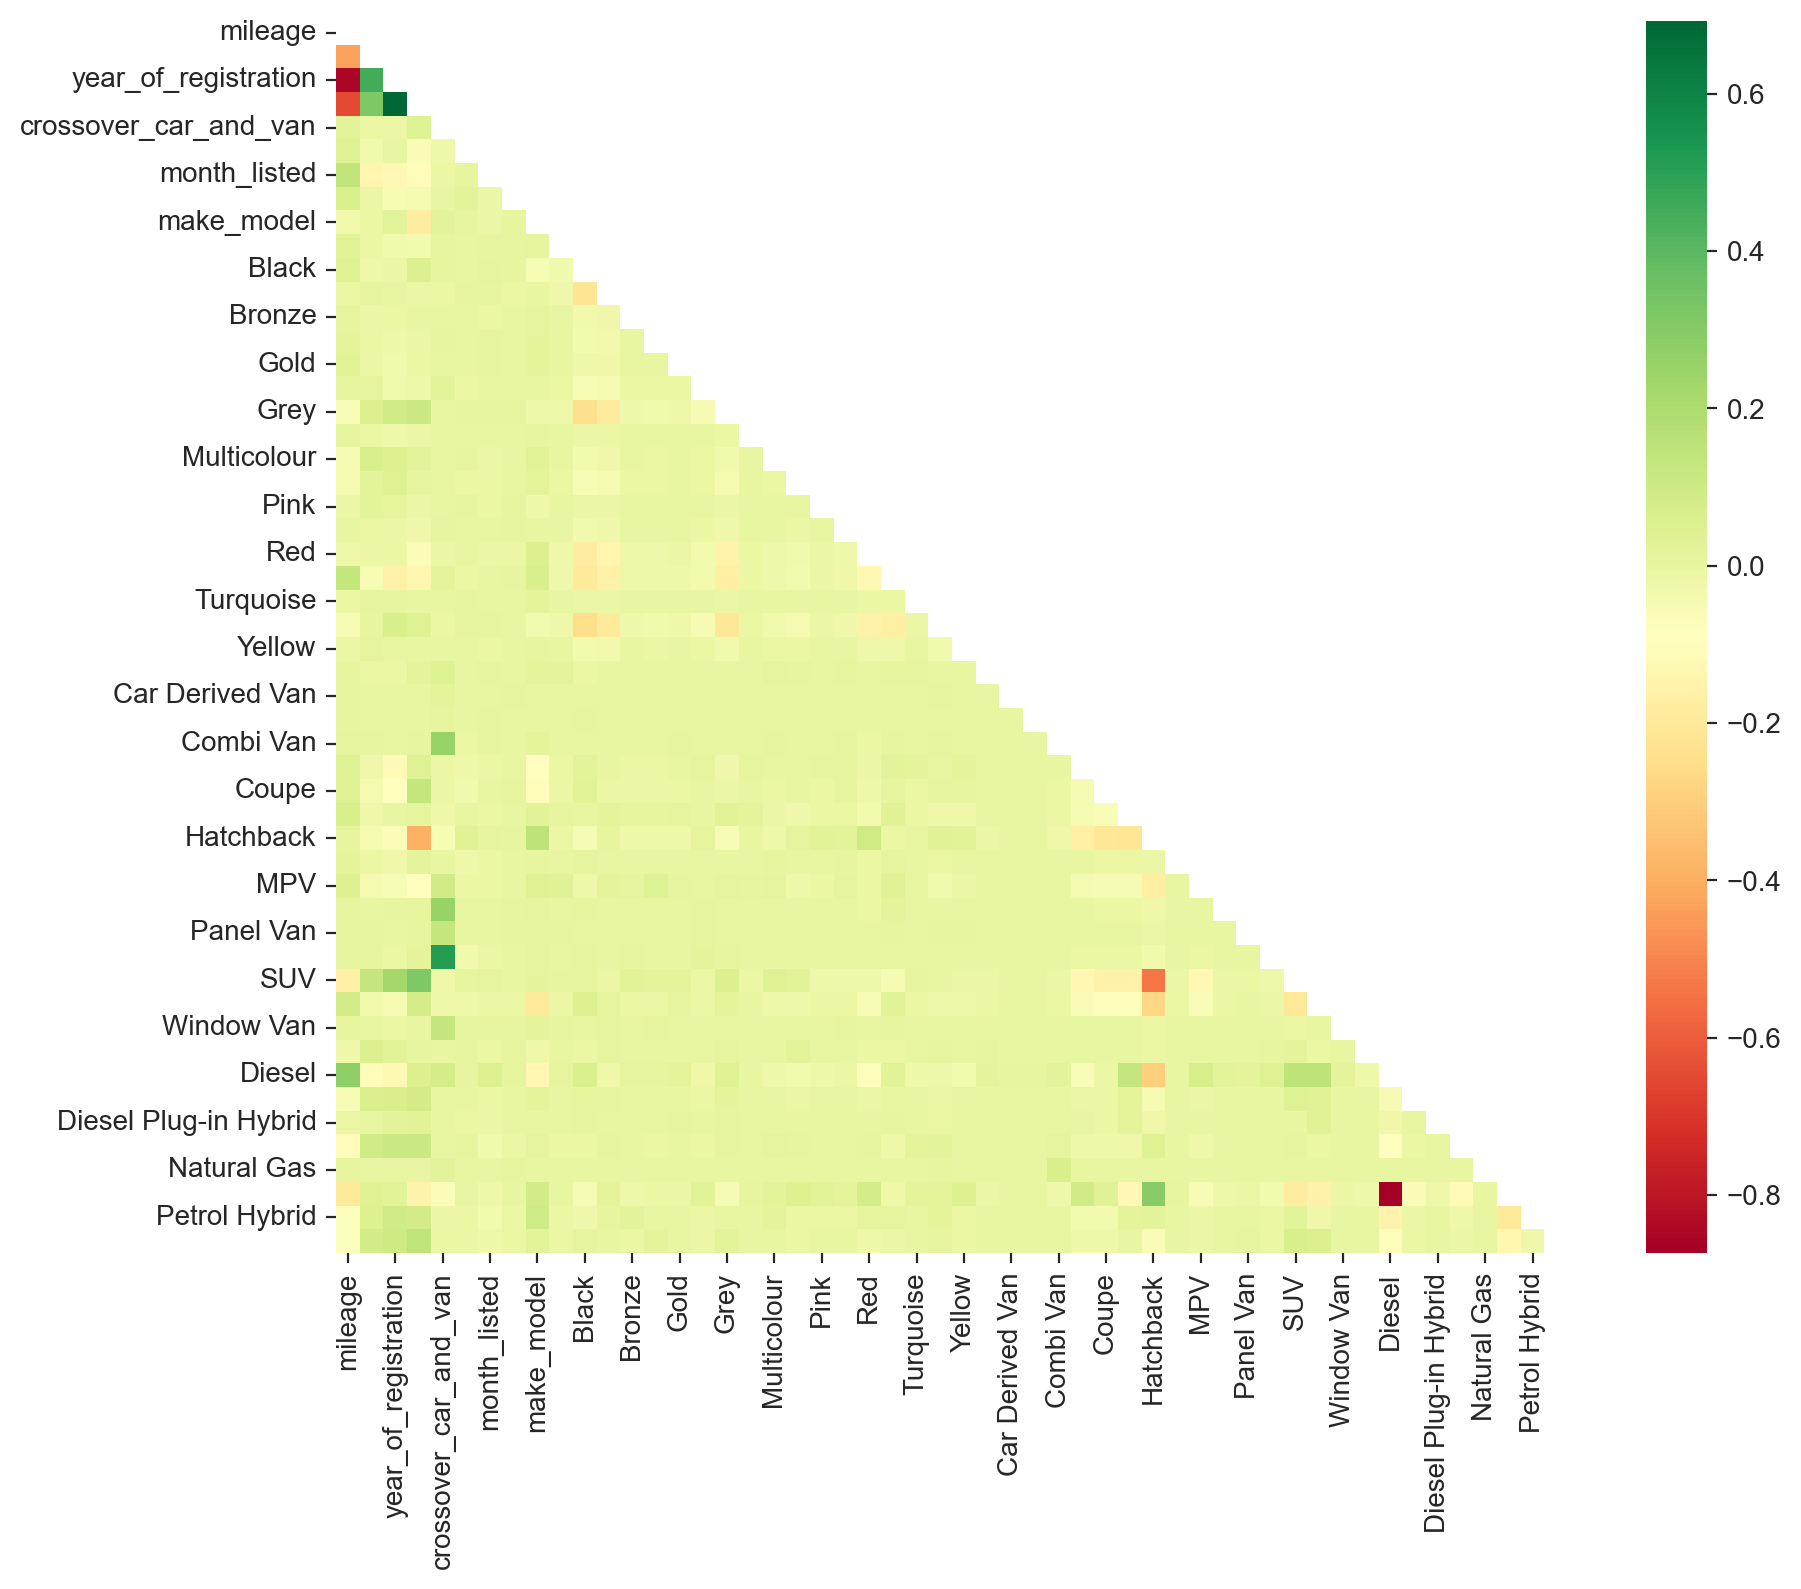

In [17]:
# Calculate the correlation matrix
corr_matrix = auto.corr()

# Create a mask to hide the upper triangle (including the diagonal) with the NumPy .triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, mask=mask, square=True, annot=False, cmap='RdYlGn');

In [18]:
auto = auto.loc[auto["price"].notna()]

In [19]:
auto.columns

Index(['mileage', 'vehicle_condition', 'year_of_registration', 'price',
       'crossover_car_and_van', 'year_listed', 'month_listed', 'day_listed',
       'make_model', 'Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Gold',
       'Green', 'Grey', 'Maroon', 'Multicolour', 'Orange', 'Pink', 'Purple',
       'Red', 'Silver', 'Turquoise', 'White', 'Yellow', 'Camper',
       'Car Derived Van', 'Chassis Cab', 'Combi Van', 'Convertible', 'Coupe',
       'Estate', 'Hatchback', 'Limousine', 'MPV', 'Minibus', 'Panel Van',
       'Pickup', 'SUV', 'Saloon', 'Window Van', 'Bi Fuel', 'Diesel',
       'Diesel Hybrid', 'Diesel Plug-in Hybrid', 'Electric', 'Natural Gas',
       'Petrol', 'Petrol Hybrid', 'Petrol Plug-in Hybrid'],
      dtype='object')

In [8]:
seed = 42

In [9]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Cross validation

In [22]:
models=[];
models.append(('LNR', LinearRegression()))
models.append(("KNN", KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
# models.append(("MLP", MLPRegressor()))

# Set a seed for reproducibility
np.random.seed(seed)

names=[];
result=[];
for name,model in models:
    k_fold=model_selection.KFold(n_splits=5, shuffle=True)
    score=model_selection.cross_val_score(model, X, y, cv=k_fold);
    result.append(score)
    names.append(name)
    print(name,score.mean().round(3),score.std().round(3))

LNR 0.694 0.002
KNN 0.926 0.0
DTR 0.911 0.001
RFR 0.951 0.001
MLP 0.748 0.058


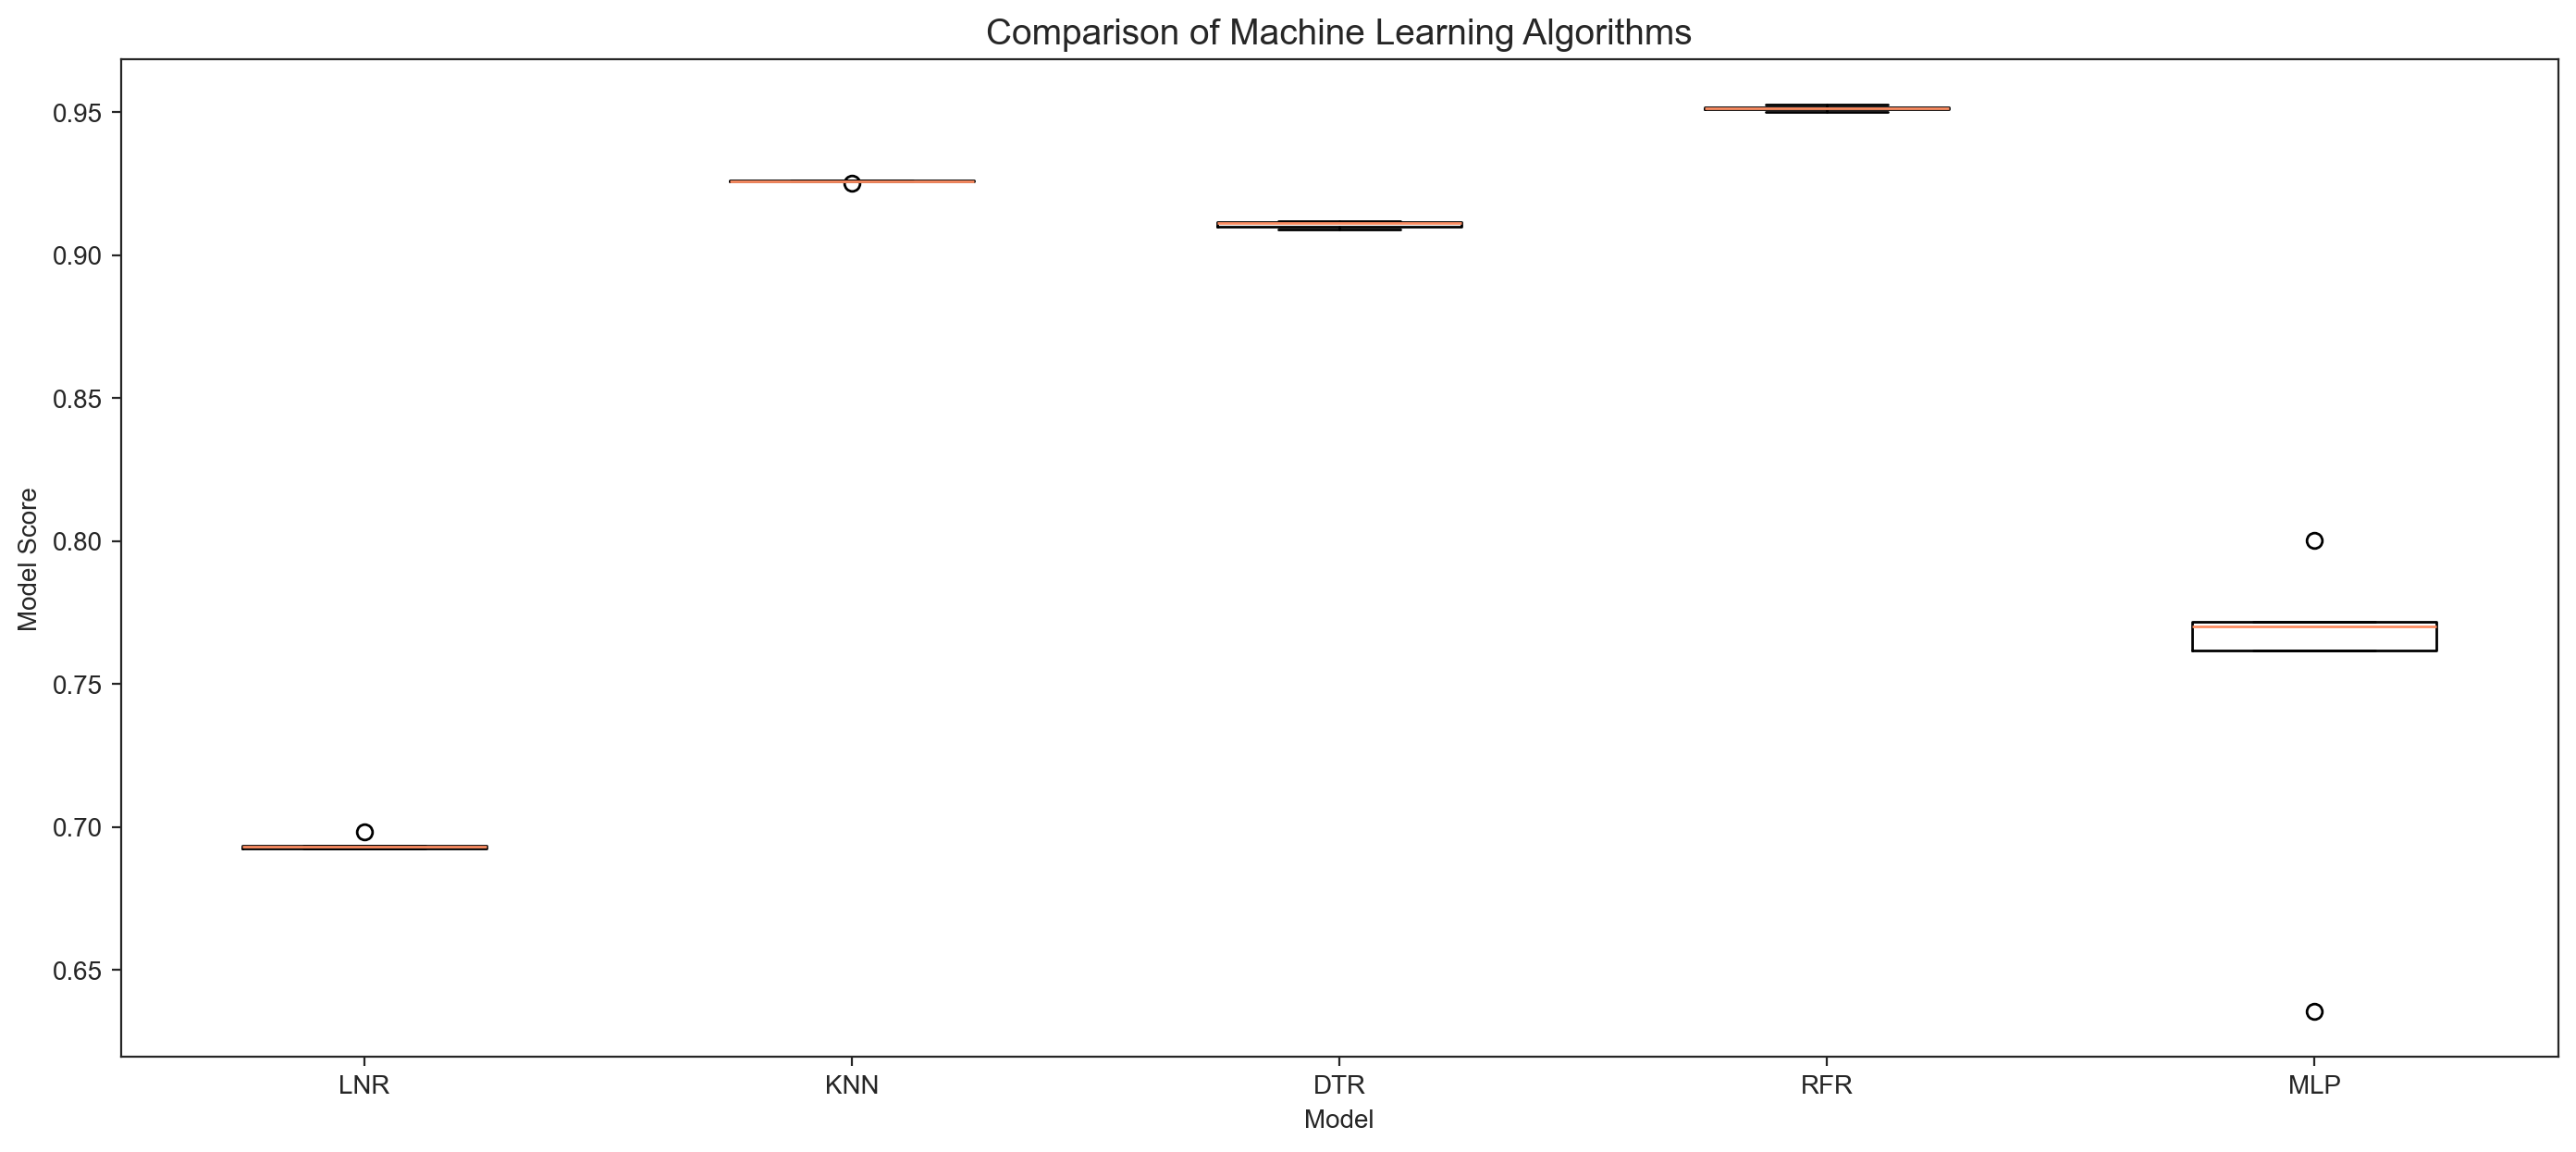

In [23]:
plt.boxplot(result,labels=names)
plt.title('Comparison of Machine Learning Algorithms',fontsize=14)
plt.gca().set(ylabel='Model Score', xlabel='Model')
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'n_neighbors' from 1 to 20
param_grid = {
    'n_neighbors': list(range(1, 21))
}

knn = KNeighborsRegressor()

# Initialize GridSearchCV with the model and parameter grid
clf = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the scaled training data
gs_results = clf.fit(X_train, y_train)

# Convert GridSearchCV results to a DataFrame
gs_df = pd.DataFrame(gs_results.cv_results_)

In [29]:
# Display specific columns and sort by 'rank_test_score'
gs_df[[
    'param_n_neighbors', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
4,5,0.949729,0.000206,0.921677,0.001148,1
5,6,0.945826,0.000270,0.921566,0.001096,2
3,4,0.954634,0.000182,0.921446,0.000991,3
6,7,0.942550,0.000291,0.921037,0.001141,4
7,8,0.939736,0.000334,0.920230,0.001145,5


In [30]:
# Retrieve the best parameters found by GridSearchCV
gs_results.best_params_

{'n_neighbors': 5}

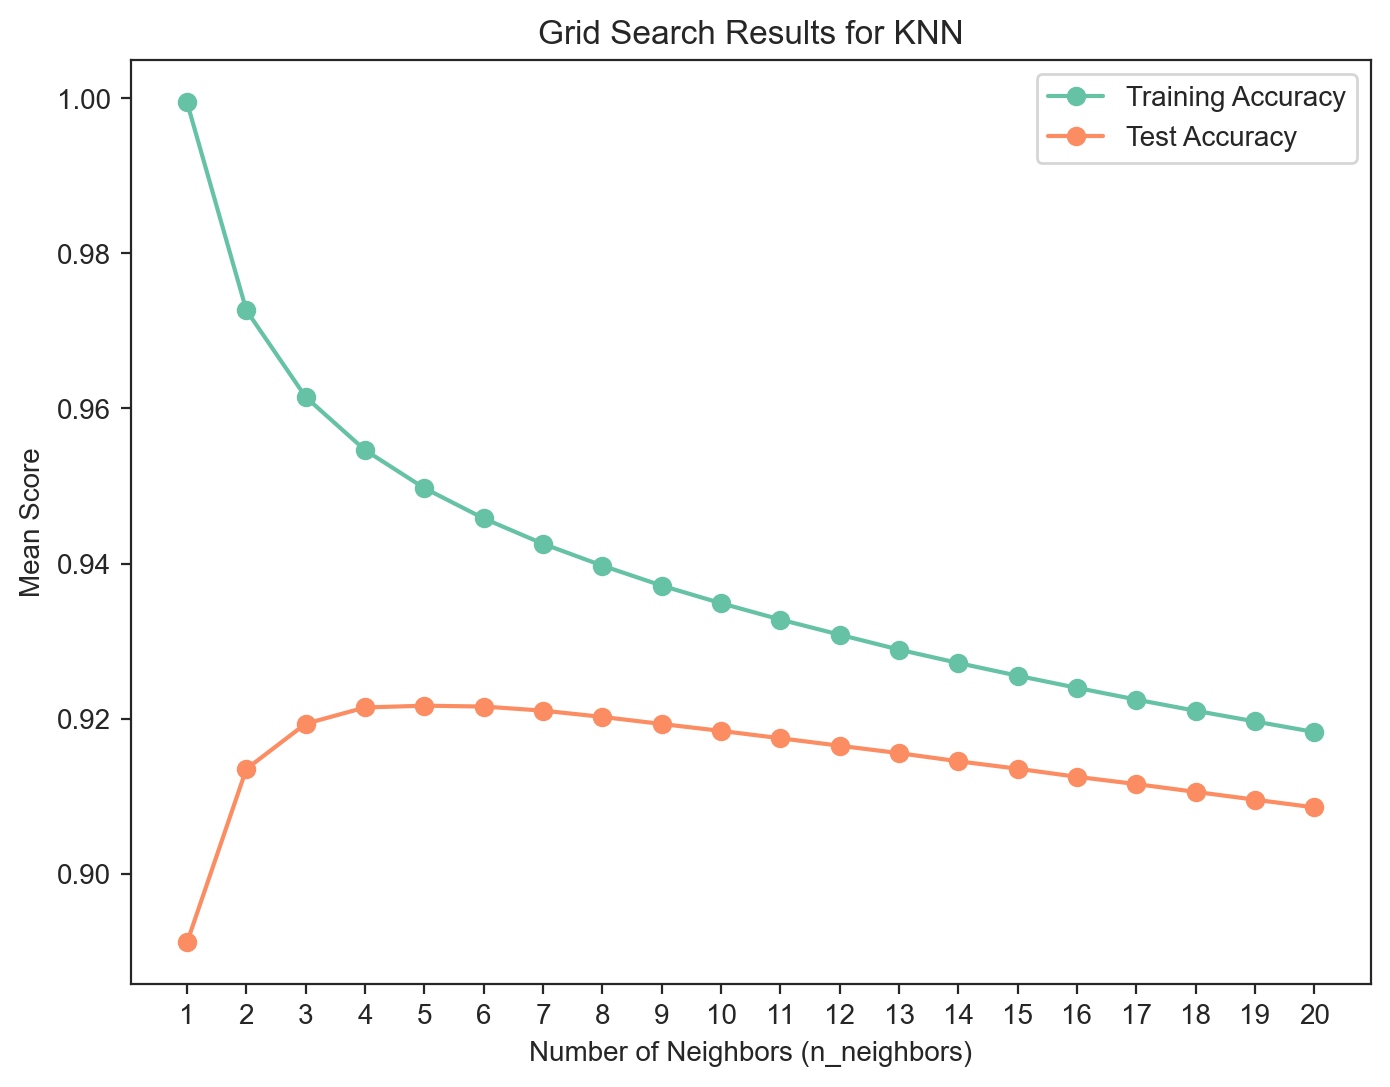

In [32]:
# Retrieve 'param_n_neighbors' and 'mean_test_score' from the grid search results DataFrame
param_values = gs_df['param_n_neighbors'].astype(int)  # Convert to integer if not already
mean_train_scores = gs_df['mean_train_score'].astype(float)  # Convert to float if not already
mean_test_scores = gs_df['mean_test_score'].astype(float)  # Convert to float if not already

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Plot both training and test accuracy values
plt.plot(param_values, mean_train_scores, label='Training Accuracy', marker='o')
plt.plot(param_values, mean_test_scores, label='Test Accuracy', marker='o')

# Label the x-axis and y-axis
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Score')

# Set x-axis ticks to the 'n_neighbors' values
plt.xticks(param_values)

# Show plot title and display the plot
plt.title('Grid Search Results for KNN')
plt.legend()
#plt.grid(True)
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtr = DecisionTreeRegressor()

# Initialize GridSearchCV with the model and parameter grid
clf = GridSearchCV(dtr, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the scaled training data
gs_results = clf.fit(X_train, y_train)

# Convert GridSearchCV results to a DataFrame
gs_df = pd.DataFrame(gs_results.cv_results_)

In [39]:
# Display specific columns and sort by 'rank_test_score'
gs_df[[
    'param_max_depth', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_max_depth,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
17,20,0.964909,0.000249,0.928016,0.001776,1
14,20,0.968349,0.000212,0.927269,0.001587,2
15,20,0.966318,0.000289,0.927236,0.001750,3
16,20,0.966318,0.000289,0.927082,0.001820,4
26,30,0.972540,0.000231,0.926895,0.001996,5


In [47]:
# Retrieve the best parameters found by GridSearchCV
gs_results.best_params_

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}

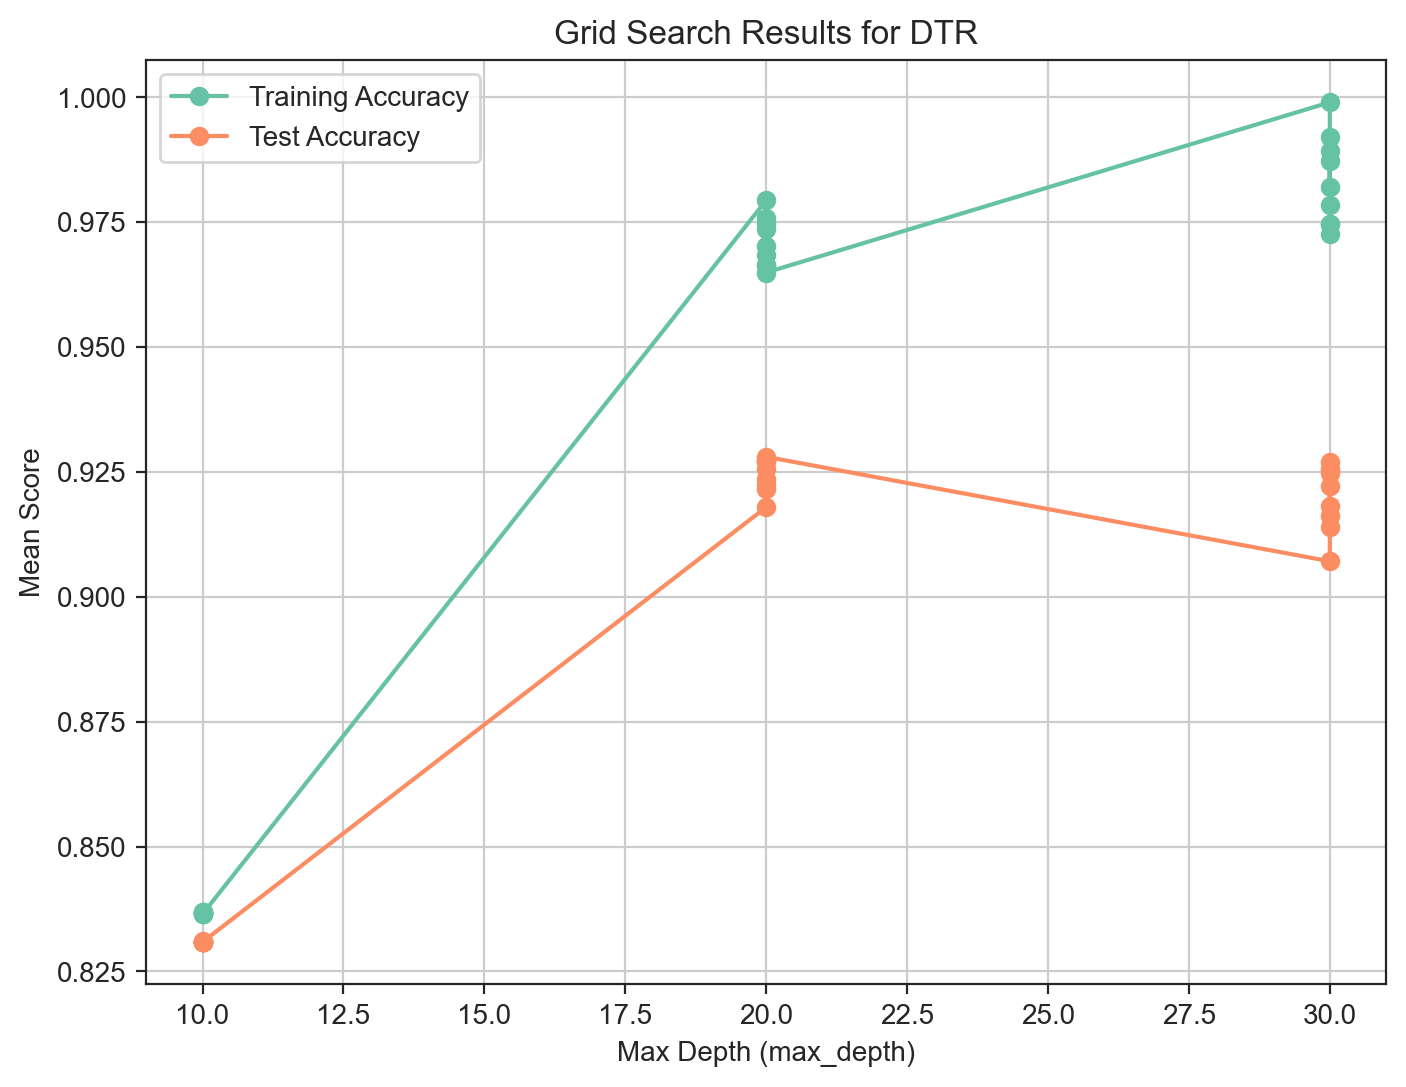

In [46]:
# Retrieve 'param_n_neighbors' and 'mean_test_score' from the grid search results DataFrame
param_values = gs_df['param_max_depth']  # Convert to integer if not already
mean_train_scores = gs_df['mean_train_score'].astype(float)  # Convert to float if not already
mean_test_scores = gs_df['mean_test_score'].astype(float)  # Convert to float if not already

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Plot both training and test accuracy values
plt.plot(param_values, mean_train_scores, label='Training Accuracy', marker='o')
plt.plot(param_values, mean_test_scores, label='Test Accuracy', marker='o')

# Label the x-axis and y-axis
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Mean Score')

# Set x-axis ticks to the 'n_neighbors' values
# plt.xticks(param_values)

# Show plot title and display the plot
plt.title('Grid Search Results for DTR')
plt.legend()
plt.grid(True)
plt.show()

# KernelRidge SVR

In [9]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [10]:
svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

In [11]:
# kr.fit(X_train, y_train)
# print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")

In [ ]:
svr.fit(X_train, y_train)
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")

In [ ]:
# Retrieve the best parameters found by GridSearchCV
gs_results.best_params_

In [ ]:
# Retrieve the best estimator (model) found by GridSearchCV
gs_results.best_estimator_

In [ ]:
# # === Restore the transformers and inverse transform ===
# # Load the transformers
# with open('power_transformer.pkl', 'rb') as f:
#     loaded_pt = pickle.load(f)

# with open('robust_scaler.pkl', 'rb') as f:
#     loaded_scaler = pickle.load(f)

# # Inverse transform (RobustScaler first, then PowerTransformer)
# restored_data = loaded_scaler.inverse_transform(auto)
# # restored_data = loaded_pt.inverse_transform(restored_data[['price', 'mileage', 'year_of_registration']])
# restored_data[['price', 'mileage', 'year_of_registration']]